<a href="https://colab.research.google.com/github/dorelysm/AI_practices/blob/main/K_means_Clustering_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

datos = pd.read_csv("housing.csv")

In [3]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

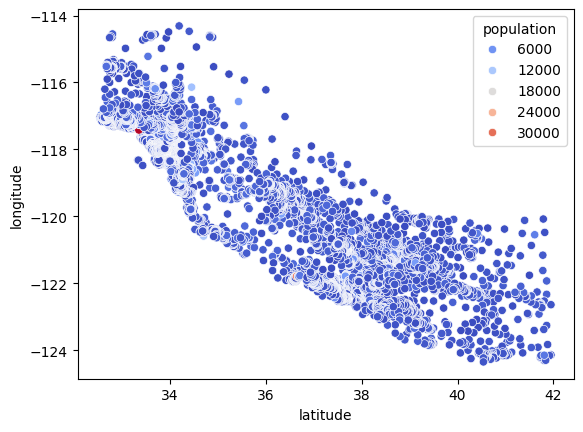

In [5]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=datos, hue="population",
               palette="coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

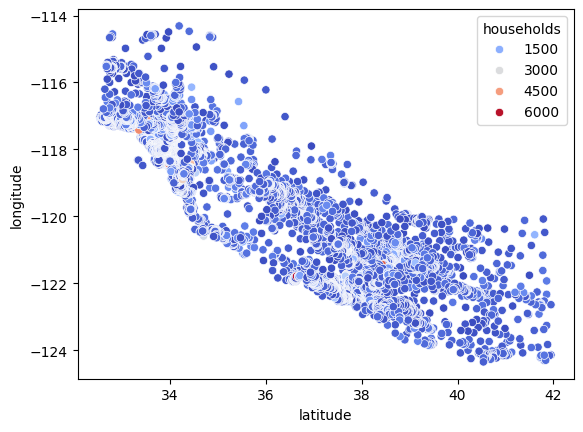

In [6]:
sb.scatterplot(x="latitude", y="longitude", data=datos, hue="households",
               palette="coolwarm")

In [7]:
datos.loc[:, ["latitude", "longitude", "population"]]

,latitude,longitude,population
0,37.88,-122.23,322.0
1,37.86,-122.22,2401.0
2,37.85,-122.24,496.0
3,37.85,-122.25,558.0
4,37.85,-122.25,565.0
...,...,...,...
20635,39.48,-121.09,845.0
20636,39.49,-121.21,356.0
20637,39.43,-121.22,1007.0
20638,39.43,-121.32,741.0


In [8]:
from sklearn.cluster import KMeans
X = datos.loc[:, ["latitude", "longitude", "population"]]
modelo = KMeans(n_clusters=6)
predicciones = modelo.fit_predict(X)

In [9]:
predicciones.shape

(20640,)

In [10]:
X["Poblacion"] = predicciones

In [11]:
X

,latitude,longitude,population,Poblacion
0,37.88,-122.23,322.0,4
1,37.86,-122.22,2401.0,3
2,37.85,-122.24,496.0,4
3,37.85,-122.25,558.0,4
4,37.85,-122.25,565.0,4
...,...,...,...,...
20635,39.48,-121.09,845.0,4
20636,39.49,-121.21,356.0,4
20637,39.43,-121.22,1007.0,4
20638,39.43,-121.32,741.0,4


In [12]:
X["Poblacion"].value_counts()

,count
Poblacion,
4,8452
0,7784
3,3260
1,949
2,193
5,2


<Axes: xlabel='latitude', ylabel='longitude'>

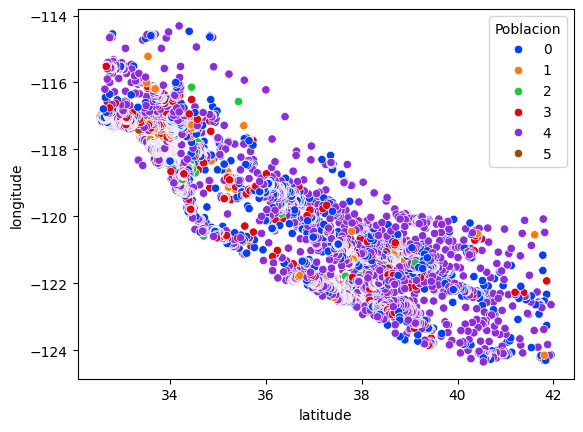

In [13]:
import seaborn as sb

sb.scatterplot(x="latitude", y="longitude", data=X, hue="Poblacion",
               palette="bright")

<Axes: xlabel='Poblacion', ylabel='count'>

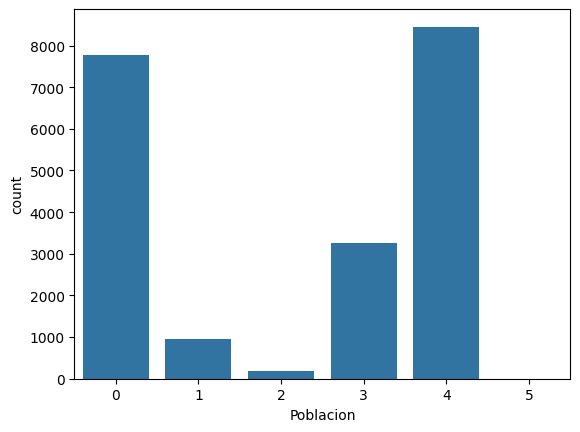

In [14]:
sb.countplot(x="Poblacion", data=X)

In [18]:
X.groupby(["Poblacion"])["population"].mean()

,population
Poblacion,
0,1375.174589
1,4031.546891
2,7867.725389
3,2340.977607
4,671.703384
5,32124.000000
